In [3]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing as p
import pandas as pd

In [4]:
data_source = "https://archive.ics.uci.edu/ml/machine-learning-databases/restricted/breast-cancer/breast-cancer.data"

names = ["class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"]

df = pd.read_csv(data_source, names=names)
df[:5]
df.dtypes

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [17]:
for column in range(0, 10):
    if column not in [6]:
        df[names[column]] = df[names[column]].astype("category")

df

KeyError: 'class'

In [6]:
df = df.dropna()

In [7]:
y_data = df.pop("class")
y_data = pd.get_dummies(y_data).as_matrix()

x_data = df
x_data.insert(0, "bias", 1)
x_data = pd.get_dummies(x_data).as_matrix()

x_data

array([[ 1.,  3.,  0., ...,  0.,  1.,  0.],
       [ 1.,  2.,  0., ...,  1.,  1.,  0.],
       [ 1.,  2.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 1.,  1.,  0., ...,  0.,  1.,  0.],
       [ 1.,  3.,  0., ...,  0.,  1.,  0.],
       [ 1.,  3.,  0., ...,  0.,  1.,  0.]])

In [8]:
x_data = p.MinMaxScaler().fit_transform(x_data)

In [9]:
training_idx = np.random.randint(y_data.shape[0], size=int(y_data.shape[0] * 0.8))
test_idx = np.random.randint(y_data.shape[0], size=int(y_data.shape[0] * 0.2))

x_training, x_test = x_data[training_idx], x_data[test_idx]
y_training, y_test = y_data[training_idx], y_data[test_idx]

In [10]:
y_training.shape

(228, 2)

In [11]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.grid_search import GridSearchCV
%matplotlib inline

In [13]:
df1 = pd.get_dummies(df, columns=[ "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"], drop_first = True)
df1.head()


bias  age_30-39  age_40-49  age_50-59  age_60-69  age_70-79  \
0     1        1.0        0.0        0.0        0.0        0.0   
1     1        0.0        1.0        0.0        0.0        0.0   
2     1        0.0        1.0        0.0        0.0        0.0   
3     1        0.0        0.0        0.0        1.0        0.0   
4     1        0.0        1.0        0.0        0.0        0.0   

   menopause_lt40  menopause_premeno  tumor-size_10-14  tumor-size_15-19  \
0             0.0                1.0               0.0               0.0   
1             0.0                1.0               0.0               0.0   
2             0.0                1.0               0.0               0.0   
3             0.0                0.0               0.0               1.0   
4             0.0                1.0               0.0               0.0   

       ...       node-caps_yes  deg-malig_2  deg-malig_3  breast_right  \
0      ...                 0.0          0.0          1.0           0.0   
1      ...                 0.0          1.0          0.0           1.0   
2      ...                 0.0          1.0          0.0           0.0   
3      ...                 0.0          1.0          0.0           1.0   
4      ...                 0.0          1.0          0.0           1.0   

   breast-quad_central  breast-quad_left_low  breast-quad_left_up  \
0                  0.0                   1.0                  0.0   
1                  0.0                   0.0                  0.0   
2                  0.0                   1.0                  0.0   
3                  0.0                   0.0                  1.0   
4                  0.0                   0.0                  0.0   

   breast-quad_right_low  breast-quad_right_up  irradiat_yes  
0                    0.0                   0.0           0.0  
1                    0.0                   1.0           0.0  
2                    0.0                   0.0           0.0  
3                    0.0                   0.0           0.0  
4                    1.0                   0.0           0.0  

[5 rows x 35 columns]

In [14]:
X = np.array(df1.drop('class_recurrence-events', axis = 1))
y = np.array(df1['class_recurrence-events'])

ValueError: labels ['class_recurrence-events'] not contained in axis

In [16]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
from sklearn.linear_model import LinearRegression
kf = KFold(X.shape[0], n_folds=10, random_state=42)

##code here
f1_mean = []
for i in [10,20,30]:
   f1_score = []
   for train_idx, test_idx in kf:
       X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
       clf = RandomForestClassifier(n_estimators=i, n_jobs=-1)
       clf.fit(X_train, y_train)
       f1_score.append(metrics.f1_score(y_test, clf.predict(X_test)))
   f1_mean.append(f1_score)

/home/seong_cheol_kim/miniconda3/envs/ml_python/lib/python3.4/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/seong_cheol_kim/miniconda3/envs/ml_python/lib/python3.4/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/seong_cheol_kim/miniconda3/envs/ml_python/lib/python3.4/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/seong_cheol_kim/miniconda3/envs/ml_python/lib/python3.4/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/seong_

In [18]:
f1_mean

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.19354838709677416,
  0.48648648648648651,
  0.44444444444444448],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.19354838709677416,
  0.40000000000000002,
  0.40000000000000002],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.19354838709677416,
  0.52631578947368418,
  0.52631578947368418]]

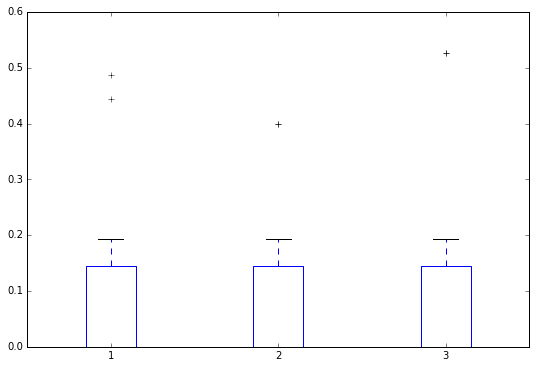

In [19]:
# Create a figure instance
fig = plt.figure(figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(f1_mean)
# ax.set_xticklabels(est_lst)

In [20]:
df1.columns

Index(['class_recurrence-events', 'age_30-39', 'age_40-49', 'age_50-59',
       'age_60-69', 'age_70-79', 'menopause_lt40', 'menopause_premeno',
       'tumor-size_10-14', 'tumor-size_15-19', 'tumor-size_20-24',
       'tumor-size_25-29', 'tumor-size_30-34', 'tumor-size_35-39',
       'tumor-size_40-44', 'tumor-size_45-49', 'tumor-size_5-9',
       'tumor-size_50-54', 'inv-nodes_12-14', 'inv-nodes_15-17',
       'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8', 'inv-nodes_9-11',
       'node-caps_no', 'node-caps_yes', 'deg-malig_2', 'deg-malig_3',
       'breast_right', 'breast-quad_central', 'breast-quad_left_low',
       'breast-quad_left_up', 'breast-quad_right_low', 'breast-quad_right_up',
       'irradiat_yes'],
      dtype='object')

In [15]:
df1.describe()

bias   age_30-39   age_40-49   age_50-59   age_60-69   age_70-79  \
count  286.0  286.000000  286.000000  286.000000  286.000000  286.000000   
mean     1.0    0.125874    0.314685    0.335664    0.199301    0.020979   
std      0.0    0.332289    0.465204    0.473050    0.400175    0.143565   
min      1.0    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.0    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.0    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.0    0.000000    1.000000    1.000000    0.000000    0.000000   
max      1.0    1.000000    1.000000    1.000000    1.000000    1.000000   

       menopause_lt40  menopause_premeno  tumor-size_10-14  tumor-size_15-19  \
count      286.000000         286.000000        286.000000        286.000000   
mean         0.024476           0.524476          0.097902          0.104895   
std          0.154791           0.500276          0.297703          0.306955   
min          0.000000           0.000000          0.000000          0.000000   
25%          0.000000           0.000000          0.000000          0.000000   
50%          0.000000           1.000000          0.000000          0.000000   
75%          0.000000           1.000000          0.000000          0.000000   
max          1.000000           1.000000          1.000000          1.000000   

           ...       node-caps_yes  deg-malig_2  deg-malig_3  breast_right  \
count      ...          286.000000   286.000000   286.000000    286.000000   
mean       ...            0.195804     0.454545     0.297203      0.468531   
std        ...            0.397514     0.498802     0.457828      0.499883   
min        ...            0.000000     0.000000     0.000000      0.000000   
25%        ...            0.000000     0.000000     0.000000      0.000000   
50%        ...            0.000000     0.000000     0.000000      0.000000   
75%        ...            0.000000     1.000000     1.000000      1.000000   
max        ...            1.000000     1.000000     1.000000      1.000000   

       breast-quad_central  breast-quad_left_low  breast-quad_left_up  \
count           286.000000            286.000000           286.000000   
mean              0.073427              0.384615             0.339161   
std               0.261293              0.487357             0.474254   
min               0.000000              0.000000             0.000000   
25%               0.000000              0.000000             0.000000   
50%               0.000000              0.000000             0.000000   
75%               0.000000              1.000000             1.000000   
max               1.000000              1.000000             1.000000   

       breast-quad_right_low  breast-quad_right_up  irradiat_yes  
count             286.000000            286.000000    286.000000  
mean                0.083916              0.115385      0.237762  
std                 0.277748              0.320046      0.426459  
min                 0.000000              0.000000      0.000000  
25%                 0.000000              0.000000      0.000000  
50%                 0.000000              0.000000      0.000000  
75%                 0.000000              0.000000      0.000000  
max                 1.000000              1.000000      1.000000  

[8 rows x 35 columns]

In [18]:
grouped = df1['bias'].groupby(df['age'])
grouped.describe()

age         
20-29  count     1.0
       mean      1.0
       std       NaN
       min       1.0
       25%       1.0
       50%       1.0
       75%       1.0
       max       1.0
30-39  count    36.0
       mean      1.0
       std       0.0
       min       1.0
       25%       1.0
       50%       1.0
       75%       1.0
       max       1.0
40-49  count    90.0
       mean      1.0
       std       0.0
       min       1.0
       25%       1.0
       50%       1.0
       75%       1.0
       max       1.0
50-59  count    96.0
       mean      1.0
       std       0.0
       min       1.0
       25%       1.0
       50%       1.0
       75%       1.0
       max       1.0
60-69  count    57.0
       mean      1.0
       std       0.0
       min       1.0
       25%       1.0
       50%       1.0
       75%       1.0
       max       1.0
70-79  count     6.0
       mean      1.0
       std       0.0
       min       1.0
       25%       1.0
       50%       1.0
       75%       1.0


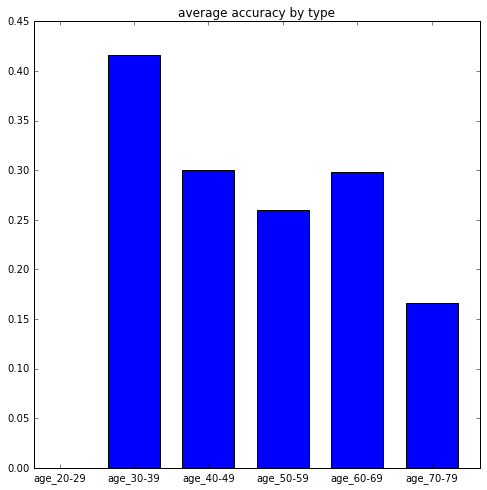

In [38]:
plt.rcParams['figure.figsize'] = (8, 8)

accuracyVec = np.array(grouped.mean())

barWidth = 0.7
xLocations = np.arange(len(accuracyVec))

fig, ax = plt.subplots()

ax.bar(xLocations, accuracyVec, barWidth, color='b')
ax.set_xticks(xLocations + 0.5*barWidth)
ax.set_xticklabels(('age_20-29', 'age_30-39', 'age_40-49', 'age_50-59', 'age_60-69', 'age_70-79'))
plt.title('average accuracy by type')

In [39]:
grouped = df1['class_recurrence-events'].groupby(df['menopause'])
grouped.mean()

menopause
ge40       0.271318
lt40       0.285714
premeno    0.320000
Name: class_recurrence-events, dtype: float64

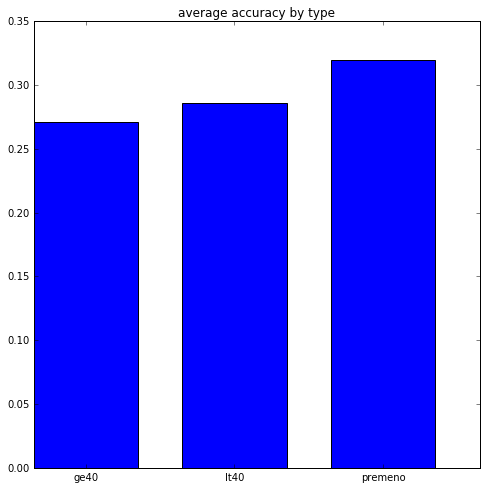

In [40]:
plt.rcParams['figure.figsize'] = (8, 8)

accuracyVec = np.array(grouped.mean())

barWidth = 0.7
xLocations = np.arange(len(accuracyVec))

fig, ax = plt.subplots()

ax.bar(xLocations, accuracyVec, barWidth, color='b')
ax.set_xticks(xLocations + 0.5*barWidth)
ax.set_xticklabels(('ge40', 'lt40', 'premeno'))
plt.title('average accuracy by type')

In [57]:
grouped = df1['class_recurrence-events'].groupby(df['inv-nodes'])
grouped.mean()

inv-nodes
0-2      0.215962
12-14    0.666667
15-17    0.500000
24-26    1.000000
3-5      0.472222
6-8      0.588235
9-11     0.600000
Name: class_recurrence-events, dtype: float64

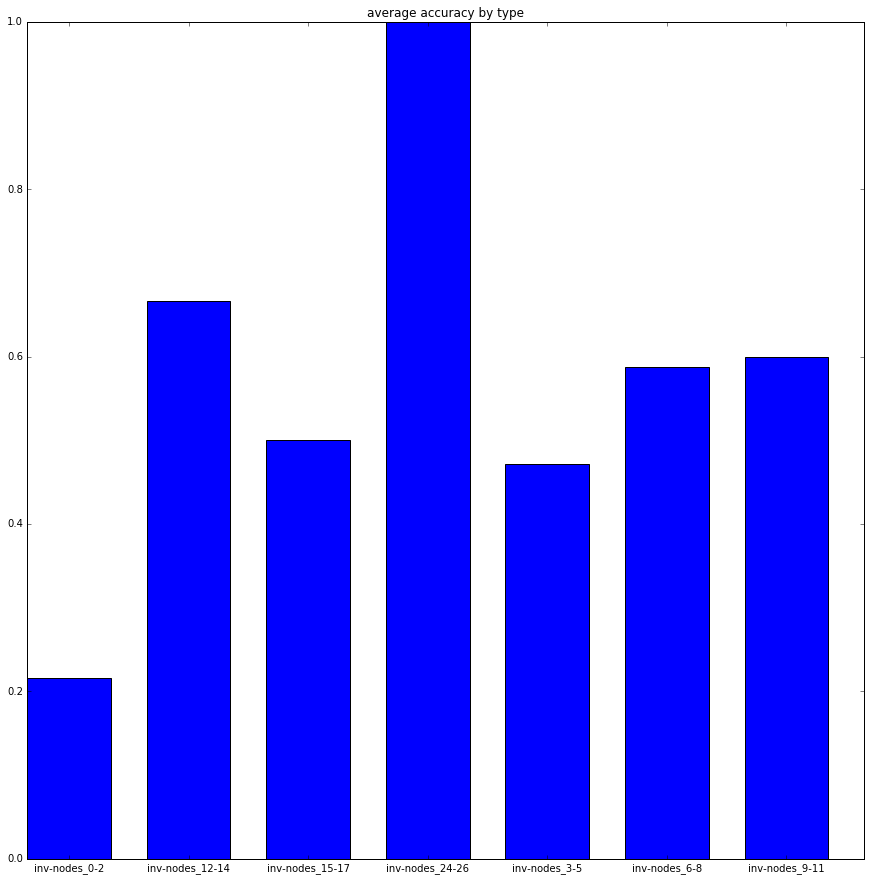

In [58]:
plt.rcParams['figure.figsize'] = (15, 15)

accuracyVec = np.array(grouped.mean())

barWidth = 0.7
xLocations = np.arange(len(accuracyVec))

fig, ax = plt.subplots()

ax.bar(xLocations, accuracyVec, barWidth, color='b')
ax.set_xticks(xLocations + 0.5*barWidth)
ax.set_xticklabels(('inv-nodes_0-2', 'inv-nodes_12-14', 'inv-nodes_15-17', 'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8', 'inv-nodes_9-11'))
plt.title('average accuracy by type')

In [43]:
df1 = df1.dropna()


In [44]:
grouped = df1['class_recurrence-events'].groupby(df['node-caps'])
grouped.mean()

node-caps
?      0.375000
no     0.229730
yes    0.553571
Name: class_recurrence-events, dtype: float64

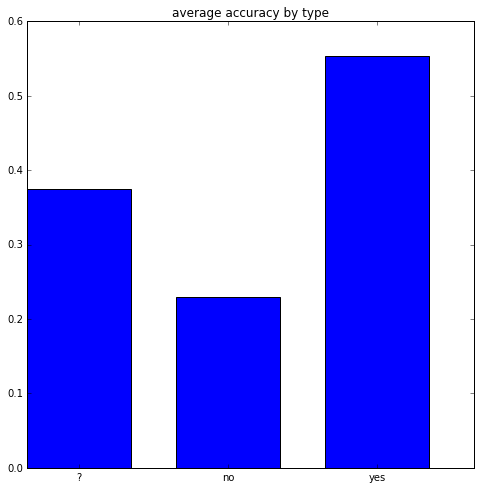

In [45]:
plt.rcParams['figure.figsize'] = (8, 8)

accuracyVec = np.array(grouped.mean())

barWidth = 0.7
xLocations = np.arange(len(accuracyVec))

fig, ax = plt.subplots()

ax.bar(xLocations, accuracyVec, barWidth, color='b')
ax.set_xticks(xLocations + 0.5*barWidth)
ax.set_xticklabels(('?', 'no', 'yes'))
plt.title('average accuracy by type')

In [59]:
grouped = df1['class_recurrence-events'].groupby(df['tumor-size'])
grouped.mean()

tumor-size
0-4      0.125000
10-14    0.035714
15-19    0.233333
20-24    0.320000
25-29    0.333333
30-34    0.416667
35-39    0.368421
40-44    0.272727
45-49    0.333333
5-9      0.000000
50-54    0.375000
Name: class_recurrence-events, dtype: float64

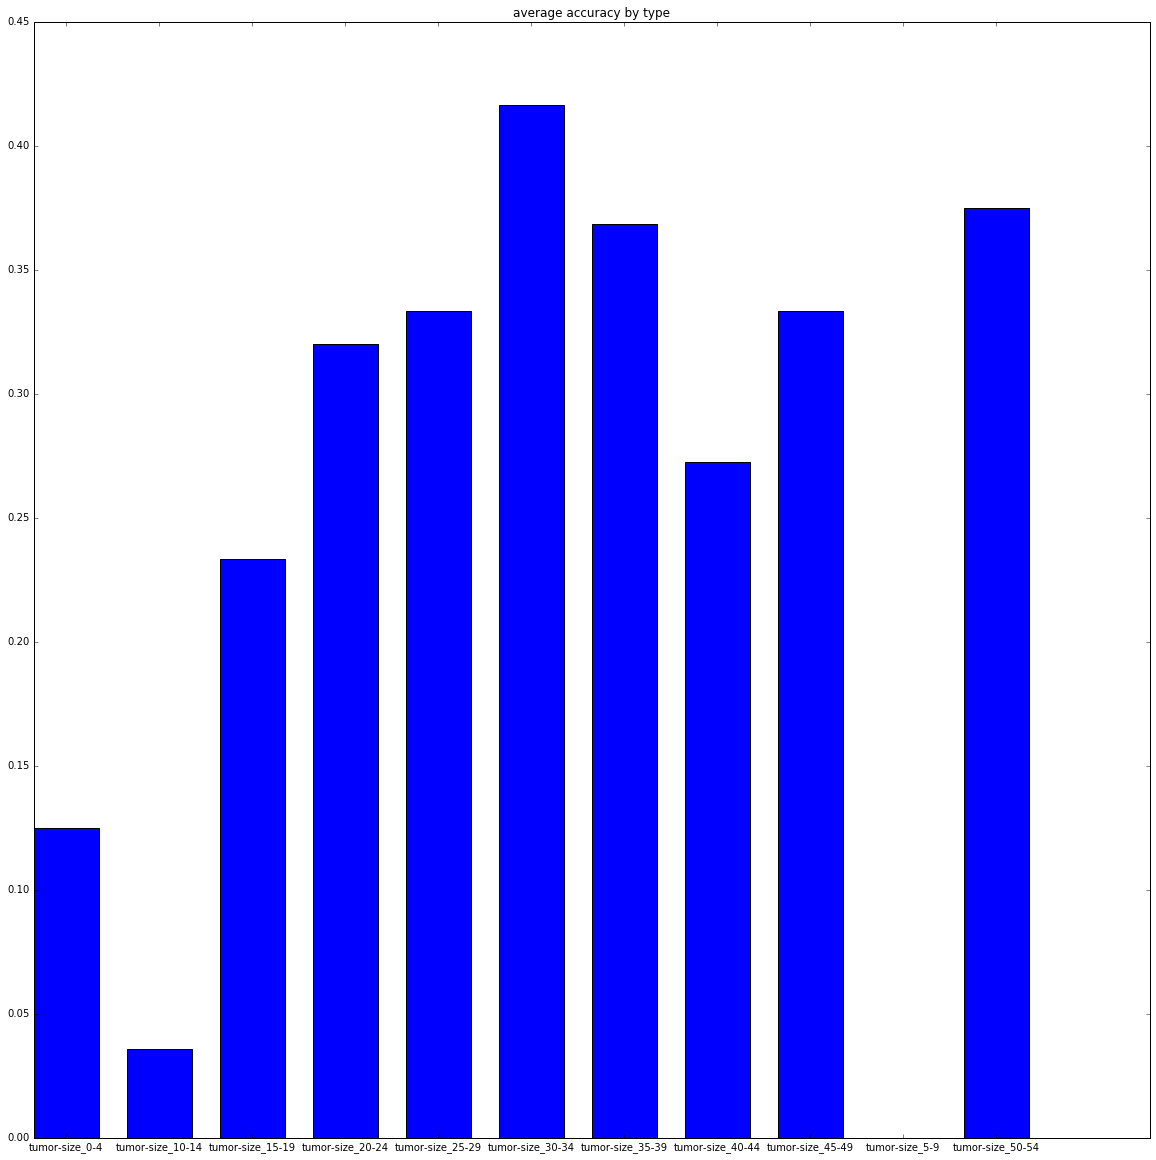

In [60]:
plt.rcParams['figure.figsize'] = (20, 20)

accuracyVec = np.array(grouped.mean())

barWidth = 0.7
xLocations = np.arange(len(accuracyVec))

fig, ax = plt.subplots()

ax.bar(xLocations, accuracyVec, barWidth, color='b')
ax.set_xticks(xLocations + 0.5*barWidth)
ax.set_xticklabels(('tumor-size_0-4', 'tumor-size_10-14', 'tumor-size_15-19', 'tumor-size_20-24', 'tumor-size_25-29', 'tumor-size_30-34', 'tumor-size_35-39', 'tumor-size_40-44', 'tumor-size_45-49', 'tumor-size_5-9','tumor-size_50-54'))
plt.title('average accuracy by type')

In [48]:
grouped = df1['class_recurrence-events'].groupby(df['deg-malig'])
grouped.mean()

deg-malig
1    0.169014
2    0.215385
3    0.529412
Name: class_recurrence-events, dtype: float64

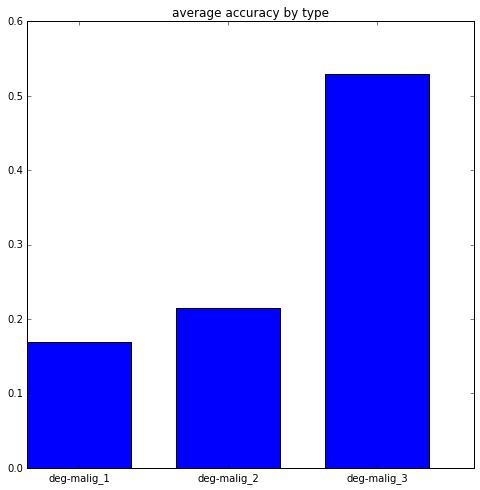

In [49]:
plt.rcParams['figure.figsize'] = (8, 8)

accuracyVec = np.array(grouped.mean())

barWidth = 0.7
xLocations = np.arange(len(accuracyVec))

fig, ax = plt.subplots()

ax.bar(xLocations, accuracyVec, barWidth, color='b')
ax.set_xticks(xLocations + 0.5*barWidth)
ax.set_xticklabels(('deg-malig_1', 'deg-malig_2', 'deg-malig_3'))
plt.title('average accuracy by type')

In [50]:
grouped = df1['class_recurrence-events'].groupby(df['breast'])
grouped.mean()

breast
left     0.322368
right    0.268657
Name: class_recurrence-events, dtype: float64

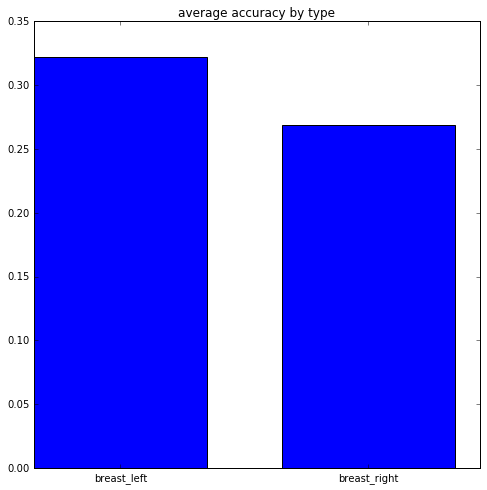

In [51]:
plt.rcParams['figure.figsize'] = (8, 8)

accuracyVec = np.array(grouped.mean())

barWidth = 0.7
xLocations = np.arange(len(accuracyVec))

fig, ax = plt.subplots()

ax.bar(xLocations, accuracyVec, barWidth, color='b')
ax.set_xticks(xLocations + 0.5*barWidth)
ax.set_xticklabels(('breast_left', 'breast_right'))
plt.title('average accuracy by type')

In [97]:
grouped = df1['class_recurrence-events'].groupby(df['breast-quad'])
grouped.mean()

breast-quad
?            1.000000
central      0.190476
left_low     0.318182
left_up      0.268041
right_low    0.250000
right_up     0.393939
Name: class_recurrence-events, dtype: float64

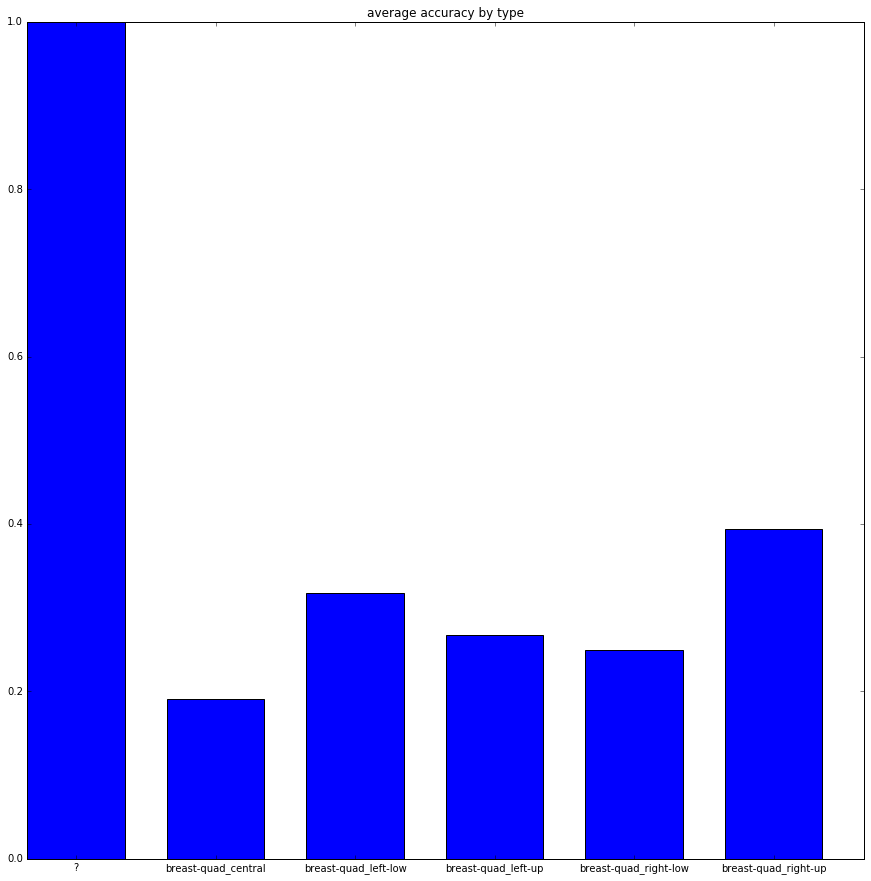

In [98]:
plt.rcParams['figure.figsize'] = (15, 15)

accuracyVec = np.array(grouped.mean())

barWidth = 0.7
xLocations = np.arange(len(accuracyVec))

fig, ax = plt.subplots()

ax.bar(xLocations, accuracyVec, barWidth, color='b') #각 값의 위치, 해당 위치의 값, 폭, 색깔
ax.set_xticks(xLocations + 0.5*barWidth)
ax.set_xticklabels(('?', 'breast-quad_central', 'breast-quad_left-low', 'breast-quad_left-up', 'breast-quad_right-low','breast-quad_right-up'))
plt.title('average accuracy by type')

In [54]:
grouped = df1['class_recurrence-events'].groupby(df['irradiat'])
grouped.mean()

irradiat
no     0.247706
yes    0.455882
Name: class_recurrence-events, dtype: float64

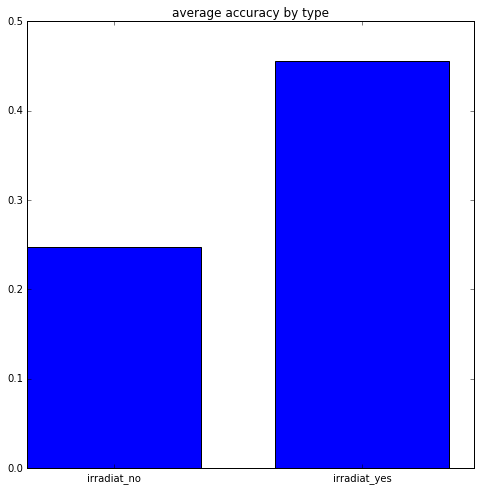

In [55]:
plt.rcParams['figure.figsize'] = (8, 8)

accuracyVec = np.array(grouped.mean())

barWidth = 0.7
xLocations = np.arange(len(accuracyVec))

fig, ax = plt.subplots()

ax.bar(xLocations, accuracyVec, barWidth, color='b')
ax.set_xticks(xLocations + 0.5*barWidth)
ax.set_xticklabels(('irradiat_no', 'irradiat_yes'))
plt.title('average accuracy by type')

In [197]:
data_source = "https://archive.ics.uci.edu/ml/machine-learning-databases/restricted/breast-cancer/breast-cancer.data"

names = ["class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"]

df = pd.read_csv(data_source, names=names)
df[:5]
df.dtypes

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [198]:
for column in range(0, 10):
    if column not in [6]:
        df[names[column]] = df[names[column]].astype("category")

df.dtypes

class          category
age            category
menopause      category
tumor-size     category
inv-nodes      category
node-caps      category
deg-malig         int64
breast         category
breast-quad    category
irradiat       category
dtype: object

In [199]:
df['age_edge'] = df['age'].map(lambda x: 0 if x == '20-29' or x == '70-79' else 1)
df['inv-nodes_under-50'] = df['inv-nodes'].map(lambda x: 0 if x == '0-2' or x == '15-17' or x == '3-5' else 1)
df['tumor-size_under-15'] = df['tumor-size'].map(lambda x: 0 if x == '0-4' or x == '10-14' or x == '5-9' else 1)
df['deg-malig_non3'] = df['deg-malig'].map(lambda x : 1 if x == '3' else 0)
df['breast-quad_under_20'] = df['breast-quad'].map(lambda x : 1 if x == 'left-up' or x == 'right-low' else 0)
df['irradiat_yes'] = df['irradiat'].map(lambda x : 1 if x == 'yes' else 0)
# df['multi-tumor-size'] = df['tumor-size'].map(lambda x : x *2)
# df[''] = df[''].map(lambda x : )

In [200]:
df = pd.get_dummies(df, columns=["class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"], drop_first = True)
X1 = np.array(df.drop('class_recurrence-events', axis = 1))
y1 = np.array(df['class_recurrence-events'])

In [189]:
X1.shape

(286, 34)

In [190]:
import warnings
warnings.filterwarnings("ignore")

In [171]:
%%time
rf_grid = GridSearchCV(
    estimator = RandomForestClassifier(random_state=42),
    param_grid = {
        'n_estimators': [100, 200],
        'max_features': ['sqrt', 'log2']
    }, 
    cv = 15, 
    scoring = 'accuracy',
    n_jobs = -1)

rf_grid.fit(X1, y1)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

0.713286713287
{'n_estimators': 200, 'max_features': 'log2'}
CPU times: user 608 ms, sys: 64 ms, total: 672 ms
Wall time: 7.78 s


In [172]:
%%time

#Logistic Regression의 penalty('l1', 'l2'), C(0.01, 1, 10, 100) 에 대해서 grid search

##code here
lr_grid = GridSearchCV(estimator = LogisticRegression(), param_grid = {'penalty' : ['l1', 'l2'], 'C' : [0.01, 1, 10, 100]}, cv = 10, scoring = 'accuracy', n_jobs = -1)

lr_grid.fit(X1, y1)









print(lr_grid.best_score_)
print(lr_grid.best_params_)

0.706293706294
{'C': 1, 'penalty': 'l2'}
CPU times: user 164 ms, sys: 44 ms, total: 208 ms
Wall time: 817 ms


In [173]:
%%time
rf_grid = GridSearchCV(
    estimator = RandomForestClassifier(random_state=42),
    param_grid = {
        'n_estimators': [100, 200],
        'max_features': ['sqrt', 'log2']
    }, 
    cv = 15, 
    scoring = 'accuracy',
    n_jobs = -1)

rf_grid.fit(X1, y1)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

0.713286713287
{'n_estimators': 200, 'max_features': 'log2'}
CPU times: user 572 ms, sys: 84 ms, total: 656 ms
Wall time: 8.18 s


In [201]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=33)

In [210]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20,min_samples_leaf=1.5)
clf = clf.fit(X_train,y_train)

In [211]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y,y_pred),"\n")
        
measure_performance(X_train,y_train,clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.958 

